In [1]:
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet
!pip install gym[toy_text]

from pyvirtualdisplay import Display
Display().start()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  freeglut3
Suggested packages:
  libgle3
The following NEW packages will be installed:
  freeglut3 python-opengl
0 upgraded, 2 newly installed, 0 to remove and 21 not upgraded.
Need to get 570 kB of archives.
After this operation, 5,733 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 freeglut3 amd64 2.8.1-3 [73.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 570 kB in 1s (769 kB/s)
Selecting previously unselected package freeglut3:amd64.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../freeglut3_2.8.1-3_amd64.deb ...
Unpacking freeglut3:am

In [2]:
import gym
from IPython import display
import matplotlib.pyplot as plt
import time
import numpy as np
%matplotlib inline

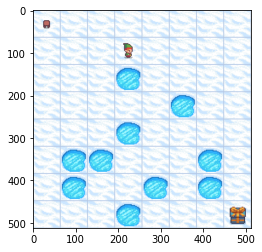

In [3]:
env = gym.make('FrozenLake-v1',map_name="8x8")
env.reset()
img = plt.imshow(env.render('rgb_array')) # only call this once
for _ in range(20):
  img.set_data(env.render('rgb_array')) # just update the data
  display.display(plt.gcf())
  display.clear_output(wait=True)
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  # time.sleep(0.5)
  if done:
    env.reset()
env.close()

In [4]:
action_size = env.action_space.n
print("Action size: ", action_size)

state_size = env.observation_space.n
print("State size: ", state_size)

Action size:  4
State size:  64


In [5]:
qtable_history = []
score_history = []
qtable = np.zeros((state_size, action_size))

total_episodes = 250000       # Total episodes
learning_rate = 0.8           # Learning rate
max_steps = 400               # Max steps per episode
gamma = 0.9                  # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.001            # Minimum exploration probability 
decay_rate = 0.00005             # Exponential decay rate for exploration prob

In [6]:
# List of rewards
rewards = []

# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = np.random.uniform(0, 1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()

        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
        total_rewards += reward
        
        # Our new state is state
        state = new_state
        
        # If done (if we're dead) : finish episode
        if done == True: 
            break
        
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(total_rewards)
    
    episode_count = episode + 1
    if episode_count % 10000 == 0:
        qtable_history.append(qtable)
        score_history.append(sum(rewards)/episode_count)

print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)

Score over time: 0.260768
[[1.47618518e-04 7.10161786e-04 2.24487390e-03 1.43684356e-04]
 [1.49924127e-04 1.61882260e-04 1.28923013e-03 5.51017277e-03]
 [2.58618570e-04 1.05096631e-03 6.45479241e-03 2.75182972e-04]
 [1.04128553e-03 1.21022993e-03 6.48095488e-03 4.15799663e-04]
 [9.66391778e-04 1.06704425e-03 8.64662208e-03 9.83915396e-04]
 [1.16986399e-03 2.34174598e-03 1.21594091e-02 6.76220492e-03]
 [2.79552299e-03 2.83292946e-02 2.76400751e-03 2.75961808e-03]
 [9.11163428e-03 1.89907738e-03 1.93924638e-03 2.94851258e-03]
 [2.31938233e-04 1.30567019e-04 1.39820623e-04 2.00671289e-03]
 [1.57089838e-04 7.90581153e-04 1.49486854e-04 5.70582157e-03]
 [2.30119225e-04 2.54983222e-04 7.40669514e-04 6.89998231e-03]
 [2.68856655e-04 1.17939313e-04 3.24841140e-04 5.12102145e-03]
 [4.49641095e-04 1.40926290e-02 6.81313821e-04 7.71347954e-04]
 [1.41418267e-03 1.33571160e-03 1.70001949e-02 1.42387414e-03]
 [3.04680881e-03 2.39381967e-03 1.73025036e-02 1.35921014e-02]
 [1.52113948e-02 2.96013482e-

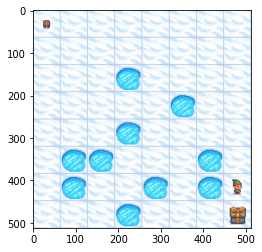

In [7]:
state = env.reset()
img = plt.imshow(env.render('rgb_array')) # only call this once
for _ in range(100):
  img.set_data(env.render('rgb_array')) # just update the data
  display.display(plt.gcf())
  display.clear_output(wait=True)
  action = np.argmax(qtable[state,:])
  state,reward,done,info = env.step(action)
  time.sleep(1)
  if done:
    break
env.close()